<a href="https://colab.research.google.com/github/Ihalagedara/pytorch-deep-learning/blob/main/tutorial_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
class Model(nn.Module):
  def __init__(self,in_features=4,h1=8,h2=9,output=3):
    super().__init__()
    self.fc1 = nn.Linear(in_features,h1)
    self.fc2 = nn.Linear(h1,h2)
    self.out = nn.Linear(h2,output)

  def forward(self,x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x



In [ ]:
torch.manual_seed(32)
model = Model()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
url = 'https://raw.githubusercontent.com/amankharwal/Website-data/master/IRIS.csv'
df = pd.read_csv(url)

In [ ]:
df['species'] = df['species'].replace({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})

<ipython-input-25-cb9bccdfb3d6>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['species'] = df['species'].replace({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})


In [ ]:
X = df.drop('species',axis=1)
y = df['species']

In [ ]:
X = X.values
y = y.values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=32)

In [ ]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [ ]:
criteria = nn.CrossEntropyLoss()
opt = torch.optim.Adam(model.parameters(), lr=0.01)

In [ ]:
epocs = 100
losses = []
for i in range(epocs):
  y_pred = model.forward(X_train)
  loss = criteria(y_pred,y_train)
  losses.append(loss.detach().numpy())

  if i%10 == 0:
    print(f'Epoch: {i} Loss: {loss}')

  opt.zero_grad()
  loss.backward()
  opt.step()


Epoch: 0 Loss: 1.169895887374878
Epoch: 10 Loss: 0.9578844308853149
Epoch: 20 Loss: 0.7988812923431396
Epoch: 30 Loss: 0.634953498840332
Epoch: 40 Loss: 0.44043001532554626
Epoch: 50 Loss: 0.29171693325042725
Epoch: 60 Loss: 0.17829042673110962
Epoch: 70 Loss: 0.11587585508823395
Epoch: 80 Loss: 0.08928148448467255
Epoch: 90 Loss: 0.07743765413761139


Text(0.5, 0, 'Epochs')

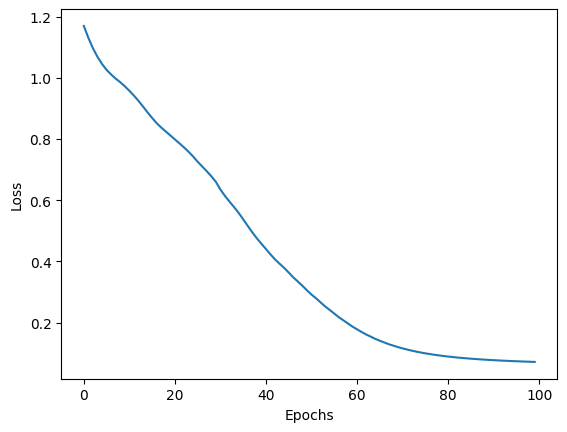

In [ ]:
plt.plot(range(epocs),losses)
plt.ylabel('Loss')
plt.xlabel('Epochs')

In [ ]:
with torch.no_grad():
  y_ecal = model.forward(X_test)
  loss_e = criteria(y_ecal,y_test)

In [ ]:
loss_e

tensor(0.0539)

In [ ]:
correct = 0
with torch.no_grad():
  for i,data in enumerate(X_test):
    y_val = model.forward(data)
    print(f'{i+1:2}. {str(y_val):38} {y_test[i]}')

    if y_val.argmax().item() == y_test[i]:
      correct += 1
print(f'\n{correct} out of {len(y_test)} correct')

 1. tensor([-3.3580,  3.9452,  0.3616])    1
 2. tensor([  7.5862,   1.1113, -11.3861]) 0
 3. tensor([  6.6288,   1.5092, -10.4603]) 0
 4. tensor([-3.3305,  4.2647,  0.0569])    1
 5. tensor([-7.3705,  2.8135,  5.1481])    2
 6. tensor([-7.3749,  3.9061,  4.2781])    2
 7. tensor([  6.2304,   1.6527, -10.0543]) 0
 8. tensor([  6.8783,   1.4056, -10.7016]) 0
 9. tensor([-2.6728,  4.3138, -0.6444])    1
10. tensor([  7.2201,   1.3890, -11.1494]) 0
11. tensor([-3.8269,  4.4110,  0.5165])    1
12. tensor([-8.6886,  1.9990,  6.9012])    2
13. tensor([-2.0605,  3.8275, -0.7672])    1
14. tensor([-1.0676,  4.3809, -2.2975])    1
15. tensor([-7.5000,  2.6230,  5.3318])    2
16. tensor([-8.6214,  1.5491,  7.1280])    2
17. tensor([-3.7724,  3.6503,  0.9422])    1
18. tensor([-6.7624,  2.7791,  4.5289])    2
19. tensor([-1.6978,  4.2047, -1.4772])    1
20. tensor([  7.8104,   1.3824, -11.9435]) 0
21. tensor([  6.9175,   1.5954, -10.9322]) 0
22. tensor([-9.4323,  2.7058,  7.2346])    2
23. tensor